In [1]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 62.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=b8867c2f13676be8ce1f21e2928a5113cf8e54d1873f8173d551243293365fc0
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize_matplotlib


In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.9 MB/s eta 0:00:00


In [3]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 11.9 MB/s eta 0:00:00


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import japanize_matplotlib

In [103]:
train_dfs = []
for i in range(47):
    num = str(i+1).zfill(2)
    train_dfs.append(pd.read_csv(num+".csv"))
train_df = pd.concat(train_dfs)
train_df.reset_index(drop=True, inplace=True)
test_df = pd.read_csv("test.csv")


In [104]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751560 entries, 0 to 751559
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            751560 non-null  int64  
 1   種類            751560 non-null  object 
 2   地域            0 non-null       float64
 3   市区町村コード       751560 non-null  int64  
 4   都道府県名         751560 non-null  object 
 5   市区町村名         751560 non-null  object 
 6   地区名           750890 non-null  object 
 7   最寄駅：名称        748788 non-null  object 
 8   最寄駅：距離（分）     728362 non-null  object 
 9   間取り           724050 non-null  object 
 10  面積（㎡）         751560 non-null  object 
 11  土地の形状         0 non-null       float64
 12  間口            0 non-null       float64
 13  延床面積（㎡）       0 non-null       float64
 14  建築年           729671 non-null  object 
 15  建物の構造         730717 non-null  object 
 16  用途            672943 non-null  object 
 17  今後の利用目的       384492 non-null  object 
 18  前面道路

In [105]:
l = len(train_df)
df = pd.concat([train_df,test_df])
df.drop(['地域','土地の形状','間口','延床面積（㎡）','前面道路：方位','前面道路：種類','前面道路：幅員（ｍ）'], inplace=True,axis=1)
train_df = df[:l]
test_df = df[l:]
test_df.head()

,ID,種類,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,...,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,1000057,中古マンション等,1101,北海道,札幌市中央区,大通西,大通,5,２ＬＤＫ,75,...,ＲＣ,NaN,住宅,商業地域,80.0,600.0,2022年第1四半期,改装済,NaN,NaN
1,1000077,中古マンション等,1101,北海道,札幌市中央区,大通西,西１１丁目,1,３ＬＤＫ,75,...,ＲＣ,NaN,その他,商業地域,80.0,600.0,2022年第2四半期,未改装,NaN,NaN
2,1000081,中古マンション等,1101,北海道,札幌市中央区,大通西,西１１丁目,3,２ＬＤＫ,75,...,ＲＣ,NaN,住宅,商業地域,80.0,600.0,2022年第2四半期,未改装,NaN,NaN
3,1000128,中古マンション等,1101,北海道,札幌市中央区,大通西,西１８丁目,3,２ＬＤＫ,50,...,ＲＣ,NaN,住宅,商業地域,80.0,400.0,2022年第2四半期,改装済,NaN,NaN
4,1000129,中古マンション等,1101,北海道,札幌市中央区,大通西,西１８丁目,0,１Ｒ,20,...,ＳＲＣ,NaN,住宅,商業地域,80.0,400.0,2022年第2四半期,未改装,NaN,NaN


In [106]:
train_df.describe()

,ID,市区町村コード,建ぺい率（％）,容積率（％）,取引価格（総額）_log
count,7.515600e+05,751560.000000,726811.000000,726811.000000,751560.000000
mean,1.850737e+07,18525.018398,67.690528,302.820155,7.231624
std,9.562456e+06,9592.101003,10.415187,148.420827,0.356035
min,1.000007e+06,1101.000000,30.000000,50.000000,2.653213
25%,1.307699e+07,13107.000000,60.000000,200.000000,7.041393
50%,1.403367e+07,14104.000000,60.000000,200.000000,7.278754
75%,2.703655e+07,27114.000000,80.000000,400.000000,7.462398
max,4.703684e+07,47213.000000,80.000000,1300.000000,9.934498


(array([2.90000e+01, 9.00000e+00, 2.70000e+01, 3.30000e+02, 9.53000e+03,
        1.70191e+05, 5.39049e+05, 3.20630e+04, 3.20000e+02, 1.20000e+01]),
 array([2.65321251, 3.38134111, 4.1094697 , 4.8375983 , 5.56572689,
        6.29385548, 7.02198408, 7.75011267, 8.47824126, 9.20636986,
        9.93449845]),
 <BarContainer object of 10 artists>)

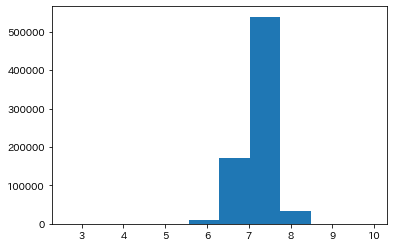

In [107]:

plt.hist(train_df["取引価格（総額）_log"])

In [108]:
l = len(train_df)
df = pd.concat([train_df,test_df])
df["面積（㎡）"] = df["面積（㎡）"].replace("2000㎡以上","2000")
df["面積（㎡）"] = df["面積（㎡）"].astype(int)
train_df = df[:l]
test_df = df[l:]

In [109]:
import warnings
warnings.simplefilter('ignore')

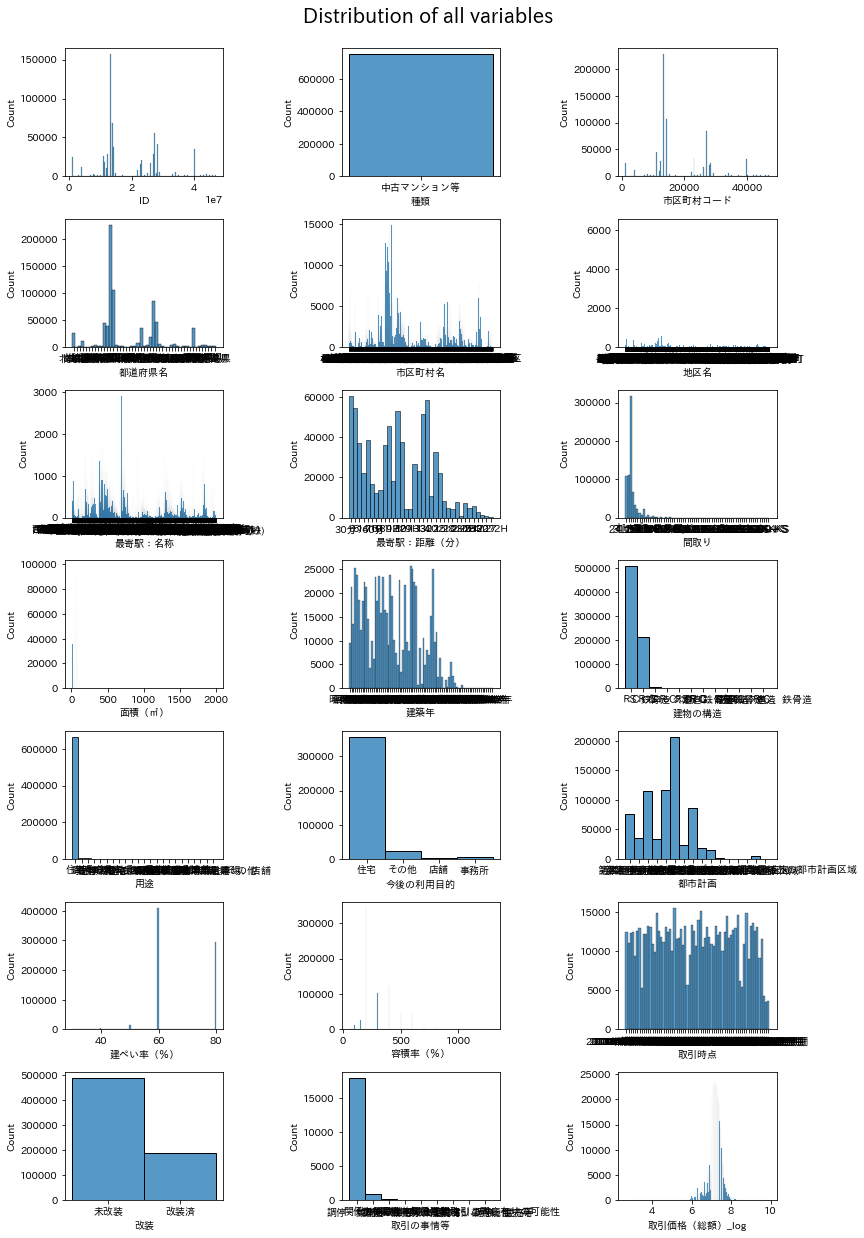

In [110]:
ncols = 3
nrows = np.ceil(len(train_df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(train_df.columns, axs.flatten()):
    sns.histplot(train_df, x=c, ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

In [111]:
numerical_feats = train_df.dtypes[train_df.dtypes != "object"].index
print("Numerical: ", len(numerical_feats))

categorical_feats = train_df.dtypes[train_df.dtypes == "object"].index
print("Categorical: ", len(categorical_feats))

Numerical:  6
Categorical:  15


In [112]:
print("Numerical:",numerical_feats)
print("Caetgorical:",categorical_feats)

Numerical: Index(['ID', '市区町村コード', '面積（㎡）', '建ぺい率（％）', '容積率（％）', '取引価格（総額）_log'], dtype='object')
Caetgorical: Index(['種類', '都道府県名', '市区町村名', '地区名', '最寄駅：名称', '最寄駅：距離（分）', '間取り', '建築年',
       '建物の構造', '用途', '今後の利用目的', '都市計画', '取引時点', '改装', '取引の事情等'],
      dtype='object')


In [113]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(14)

,Total,Percent
取引の事情等,732408,0.974517
今後の利用目的,367068,0.488408
用途,78617,0.104605
改装,72143,0.095991
間取り,27510,0.036604
容積率（％）,24749,0.032930
建ぺい率（％）,24749,0.032930
最寄駅：距離（分）,23198,0.030866
建築年,21889,0.029125
建物の構造,20843,0.027733


In [114]:
cols_fillna = ["今後の利用目的","改装","間取り","都市計画",'建物の構造']
for col in cols_fillna:
        train_df[col].fillna('None',inplace=True)
        test_df[col].fillna('None',inplace=True)

In [115]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(14)

,Total,Percent
取引の事情等,732408,0.974517
用途,78617,0.104605
容積率（％）,24749,0.032930
建ぺい率（％）,24749,0.032930
最寄駅：距離（分）,23198,0.030866
建築年,21889,0.029125
最寄駅：名称,2772,0.003688
地区名,670,0.000891
改装,0,0.000000
取引時点,0,0.000000


In [116]:
l = len(train_df)
df = pd.concat([train_df,test_df])

df["最寄駅：距離（分）"].replace({"30分?60分":"45","1H?1H30":"75","2H?":"120",'1H30?2H':"105"},inplace = True)
df["最寄駅：距離（分）"] = df["最寄駅：距離（分）"].astype(float)

def convert_wareki_to_seireki(wareki):
    if wareki == wareki:
        if wareki == '戦前':
            wareki = '昭和20年'
        value = wareki[2:-1]
        if value == '元':
            value = 1
        else:
            value = int(value)
        if '昭和' in wareki:
            seireki = 1925+value
        elif '平成' in wareki:
            seireki = 1988+value
        elif '令和' in wareki:
            seireki = 2018+value
    else:
        seireki = wareki
    return seireki
df['建築年'] = df['建築年'].apply(lambda x: 2021-convert_wareki_to_seireki(x))

df['取引時点_何年前'] = df['取引時点'].apply(lambda x: 2021-int(x[:4]))
df.drop(['取引時点'], axis=1, inplace=True)

train_df = df[:l]
test_df = df[l:]

In [117]:
cols_fillna = ["建築年","容積率（％）","建ぺい率（％）","最寄駅：距離（分）"]
for col in cols_fillna:
    train_df[col].fillna(train_df[col].mean(), inplace=True)
    test_df[col].fillna(test_df[col].mean(), inplace=True)

In [118]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(14)

,Total,Percent
取引の事情等,732408,0.974517
用途,78617,0.104605
最寄駅：名称,2772,0.003688
地区名,670,0.000891
ID,0,0.000000
取引価格（総額）_log,0,0.000000
改装,0,0.000000
容積率（％）,0,0.000000
建ぺい率（％）,0,0.000000
都市計画,0,0.000000


In [119]:
train_df["e_最寄駅：距離（分）"] = np.log(train_df["最寄駅：距離（分）"] + 1)
test_df["e_最寄駅：距離（分）"] = np.log(test_df["最寄駅：距離（分）"] + 1)

In [120]:
train_df["e_面積（㎡）"] = np.log(train_df["面積（㎡）"] + 1)
test_df["e_面積（㎡）"] = np.log(test_df["面積（㎡）"] + 1)

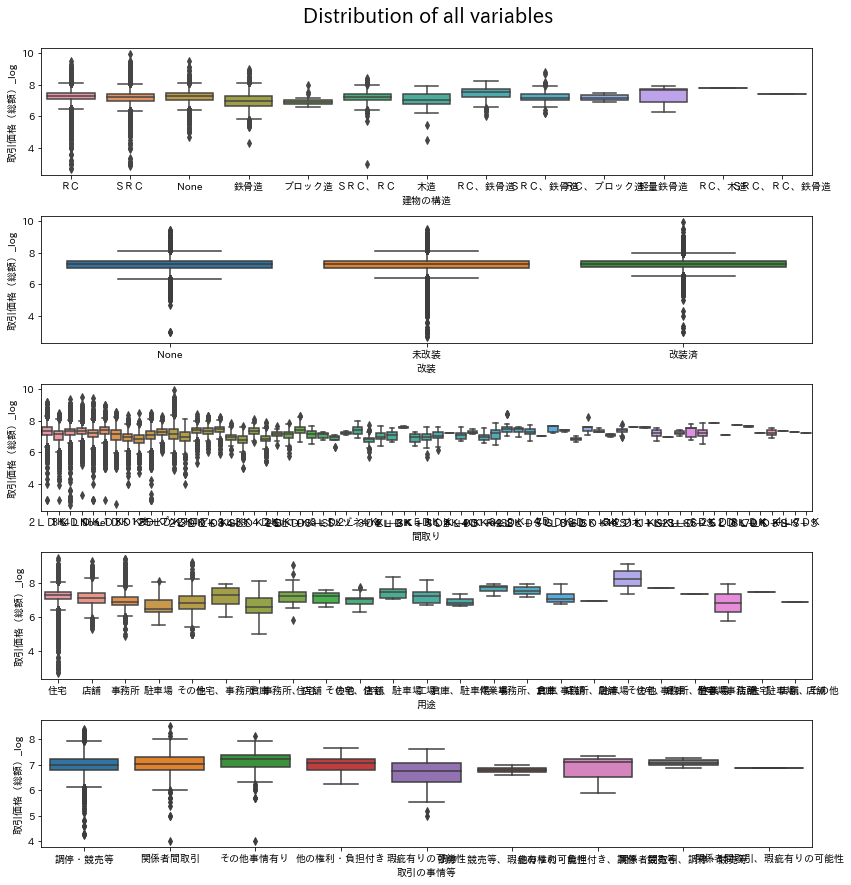

In [122]:
ncols = 1
cols = [ '建物の構造','改装', '間取り',"用途","取引の事情等"]
nrows = np.ceil(len(cols)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(cols, axs.flatten()):
    sns.boxplot(data=train_df, x=c,y='取引価格（総額）_log', ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

In [141]:
train_df.drop(train_df[(train_df["取引の事情等"]=='関係者間取引') & (train_df['取引価格（総額）_log']<4.5)].index,inplace=True)
train_df.drop(train_df[(train_df["取引の事情等"]=='その他事情有り') & (train_df['取引価格（総額）_log']<4.5)].index,inplace=True)
train_df.drop(train_df[(train_df["取引の事情等"]=='関係者間取引') & (train_df['取引価格（総額）_log']<4.5)].index,inplace=True)
train_df.drop(train_df[(train_df["建物の構造"]=='ＳＲＣ、ＲＣ') & (train_df['取引価格（総額）_log']<4.5)].index,inplace=True)
train_df.reset_index(inplace=True, drop=True)

In [142]:
print(train_df["間取り"].unique())

['２ＬＤＫ' '１Ｋ' '３ＬＤＫ' '４ＬＤＫ' 'None' '１ＬＤＫ' '１ＤＫ' '３ＤＫ' '１Ｒ' '２ＤＫ' '５ＬＤＫ'
 'オープンフロア' '２Ｋ' '２ＬＤＫ＋Ｓ' '３ＬＤＫ＋Ｓ' '１ＬＤＫ＋Ｓ' '３ＬＫ' '３Ｋ' '４ＬＤＫ＋Ｓ' '４ＤＫ' '２ＬＫ'
 '２ＤＫ＋Ｓ' '５ＬＤＫ＋Ｓ' '１ＤＫ＋Ｓ' '３ＬＤ' '１Ｌ' '２Ｌ' 'メゾネット' '４Ｋ' '３ＤＫ＋Ｓ' '４Ｌ＋Ｋ'
 '２ＬＤＫ＋Ｋ' '３Ｋ＋Ｓ' '５ＤＫ' '１ＬＫ' '１ＤＫ＋Ｋ' '２Ｋ＋Ｓ' '４ＬＤＫ＋Ｋ' '４ＤＫ＋Ｓ' '１Ｒ＋Ｓ' '６ＬＤＫ'
 '２ＬＫ＋Ｓ' '２ＬＤ＋Ｓ' '４Ｄ' '７ＬＤＫ' '１ＬＤ＋Ｓ' '３Ｄ' '３ＬＤＫ＋Ｋ' '６ＬＤＫ＋Ｓ' '５Ｋ' 'スタジオ'
 '１ＬＤＫ＋Ｋ' '１Ｌ＋Ｓ' '１Ｋ＋Ｓ' '１ＬＫ＋Ｓ' '２Ｌ＋Ｓ' '３ＬＤ＋Ｓ' '６ＤＫ' '２ＬＤ' '２Ｄ' '５ＬＤＫ＋Ｋ'
 '８ＬＤＫ' '８ＬＤＫ＋Ｓ' '７ＬＤＫ＋Ｓ' '４Ｌ' '３ＬＫ＋Ｓ' '７ＤＫ']


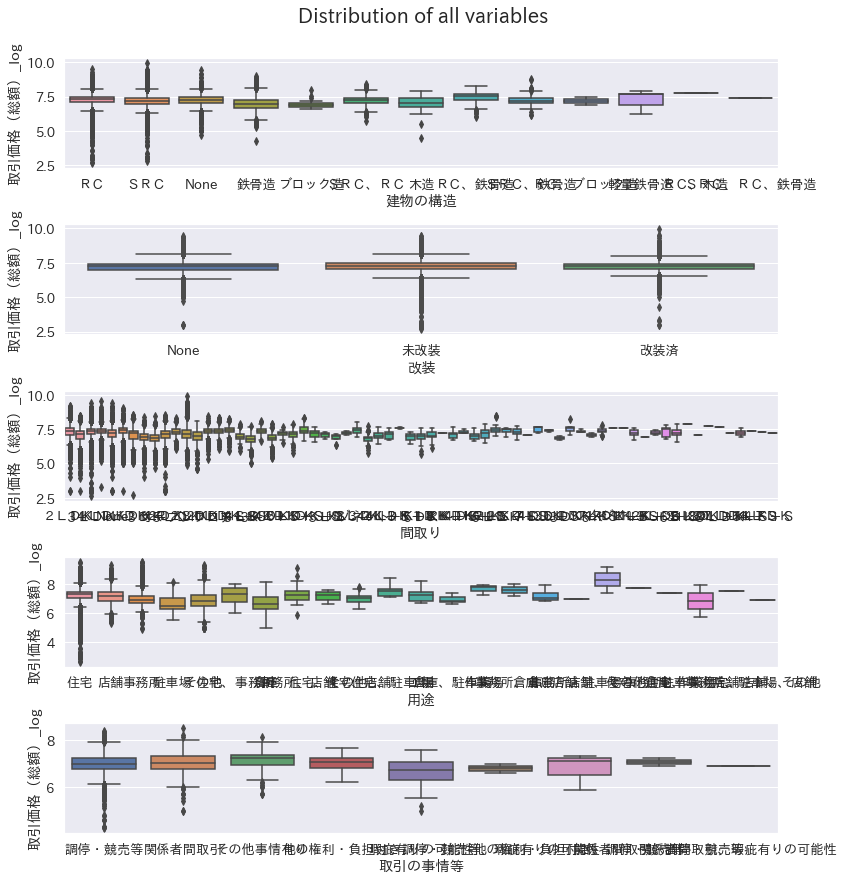

In [143]:
ncols = 1
cols = [ '建物の構造','改装', '間取り',"用途","取引の事情等"]
nrows = np.ceil(len(cols)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(cols, axs.flatten()):
    sns.boxplot(data=train_df, x=c,y='取引価格（総額）_log', ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

In [154]:
cols = ["取引の事情等","用途",'最寄駅：距離（分）',"市区町村コード", '建物の構造','取引時点_何年前', '改装', '間取り', '面積（㎡）','建築年','建ぺい率（％）', '容積率（％）']
train_X = train_df[cols]
train_Y = train_df['取引価格（総額）_log']
test_data = test_df[cols]

In [155]:
from sklearn.preprocessing import LabelEncoder
l = len(train_X)
df = pd.concat([train_X,test_data])
print(df.isnull().sum())
cols = [ '建物の構造','改装', '間取り',"用途","取引の事情等"]
for col in cols:
    le = LabelEncoder()
    encoded = le.fit_transform(df[col].values)
    decoded = le.inverse_transform(encoded)
    df[col] = encoded

取引の事情等       752758
用途            83806
最寄駅：距離（分）         0
市区町村コード           0
建物の構造             0
取引時点_何年前          0
改装                0
間取り               0
面積（㎡）             0
建築年               0
建ぺい率（％）           0
容積率（％）            0
dtype: int64


In [156]:
train_X = df[:l]
test = df[l:]

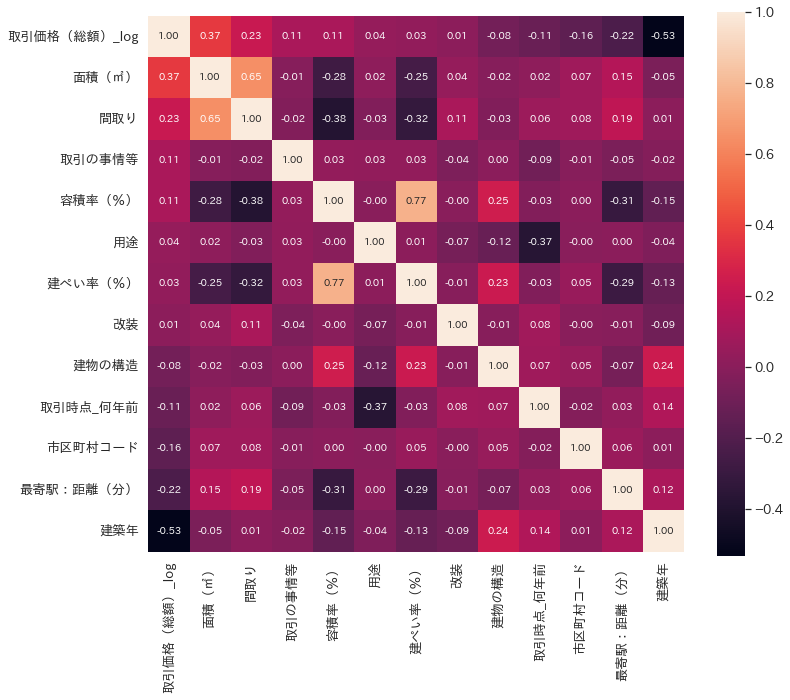

In [157]:
k = 15 # number of variables for heatmap
df = pd.concat([train_X,train_Y],axis=1)
corrmat = df.corr()
cols = corrmat.nlargest(k, '取引価格（総額）_log')['取引価格（総額）_log'].index
cm = np.corrcoef(df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2,font="IPAexGothic")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
fig.savefig("figure4.png")

In [158]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_absolute_error
import optuna

In [160]:
N_split = 2
kf = KFold(n_splits=N_split)

def objective(trial):
   
    params = {
            'objective': 'reg:squarederror',
            'tree_method': 'hist',
            'grow_policy' : trial.suggest_categorical ('grow_policy', ['lossguide','depthwise']),
            'learning_rate':trial.suggest_loguniform('learning_rate', 0.01, 0.2),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 1, 10),
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-15, 10.0),
            'max_delta_step':trial.suggest_int('max_delta_step', 1, 10),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
            'colsample_bytree':trial.suggest_loguniform('colsample_bytree', 0.4, 1.0),
            'subsample': trial.suggest_loguniform('subsample', 0.4, 1.0),
            'seed':42
                }
    if params['grow_policy'] == 'lossguide':
        params['max_leaves'] = trial.suggest_int('max_leaves', 1, 100)   
        
        
    score_list = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(train_X, train_Y)):
        X_train = train_X.loc[train_idx][cols]
        X_valid = train_X.iloc[val_idx][cols]
        
       
        X_train_f = X_train
        Y_train = train_Y.loc[train_idx].values

        X_valid_f = X_valid
        Y_valid = train_Y.loc[val_idx].values


        model = xgb.XGBRegressor(**params) 
        model.fit(        
                X_train_f,
                Y_train,
                eval_set =[( X_valid_f,Y_valid)],
                verbose =0,
                early_stopping_rounds = 100)

        Y_valid_pred = model.predict(X_valid_f)
        score = mean_absolute_error(Y_valid, Y_valid_pred)
        score_list.append(score)
    return sum(score_list) / len(score_list)

try:
    cols = cols.drop('取引価格（総額）_log')
except:
    pass
xgb_study = optuna.create_study(direction='minimize')
xgb_study.optimize(objective, n_trials=20)
print(xgb_study.best_params)

[I 2023-02-24 04:54:08,014] A new study created in memory with name: no-name-77ab8c29-47ca-47a9-bf02-9eaff79910fa
[I 2023-02-24 04:54:39,744] Trial 0 finished with value: 0.16672514209005046 and parameters: {'grow_policy': 'depthwise', 'learning_rate': 0.0629467105919348, 'max_depth': 12, 'reg_alpha': 2.3282235970238667, 'reg_lambda': 6.8523608406730274e-12, 'max_delta_step': 2, 'min_child_weight': 266, 'colsample_bytree': 0.641228311963993, 'subsample': 0.683656945447933}. Best is trial 0 with value: 0.16672514209005046.
[I 2023-02-24 04:54:57,850] Trial 1 finished with value: 0.2546640625093861 and parameters: {'grow_policy': 'lossguide', 'learning_rate': 0.07254340097322068, 'max_depth': 20, 'reg_alpha': 4.504850771630948, 'reg_lambda': 0.004057470901974066, 'max_delta_step': 1, 'min_child_weight': 197, 'colsample_bytree': 0.6817326884777496, 'subsample': 0.6940887459480013, 'max_leaves': 17}. Best is trial 0 with value: 0.16672514209005046.
[I 2023-02-24 04:55:26,312] Trial 2 finis

{'grow_policy': 'depthwise', 'learning_rate': 0.10056558869398592, 'max_depth': 8, 'reg_alpha': 1.0093069815014477, 'reg_lambda': 5.9482667088548494e-08, 'max_delta_step': 7, 'min_child_weight': 4, 'colsample_bytree': 0.5530955681364523, 'subsample': 0.5817578410049746}


In [161]:
xgb_best_params = xgb_study.best_params
add_params = {
        'objective': 'reg:squarederror',
        'seed':42,
        'n_estimators':20000
        }
xgb_best_params.update(add_params)

X_train, X_eval, Y_train, Y_eval = train_test_split(train_X, train_Y, test_size=0.2, random_state=0)
model_xgb = xgb.XGBRegressor(**xgb_best_params) 

model_xgb.fit(        
        X_train,
        Y_train,
        eval_set =[( X_eval,Y_eval)],
        verbose =100,
        early_stopping_rounds = 100
)



[0]	validation_0-rmse:6.06528
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:0.144565
[200]	validation_0-rmse:0.138961
[300]	validation_0-rmse:0.136776
[400]	validation_0-rmse:0.135606
[500]	validation_0-rmse:0.134901
[600]	validation_0-rmse:0.134327
[700]	validation_0-rmse:0.133881
[800]	validation_0-rmse:0.133523
[900]	validation_0-rmse:0.133208
[1000]	validation_0-rmse:0.13289
[1100]	validation_0-rmse:0.132756
[1200]	validation_0-rmse:0.132598
[1300]	validation_0-rmse:0.132457
[1400]	validation_0-rmse:0.132327
[1500]	validation_0-rmse:0.132252
[1600]	validation_0-rmse:0.132172
[1700]	validation_0-rmse:0.132082
[1800]	validation_0-rmse:0.132019
[1900]	validation_0-rmse:0.131958
[2000]	validation_0-rmse:0.131891
[2100]	validation_0-rmse:0.131836
[2200]	validation_0-rmse:0.131833
[2300]	validation_0-rmse:0.131809
Stopping. Best iteration:
[2256]	validation_0-rmse:0.131805



XGBRegressor(colsample_bytree=0.5530955681364523, grow_policy='depthwise',
             learning_rate=0.10056558869398592, max_delta_step=7, max_depth=8,
             min_child_weight=4, n_estimators=20000,
             objective='reg:squarederror', reg_alpha=1.0093069815014477,
             reg_lambda=5.9482667088548494e-08, seed=42,
             subsample=0.5817578410049746)

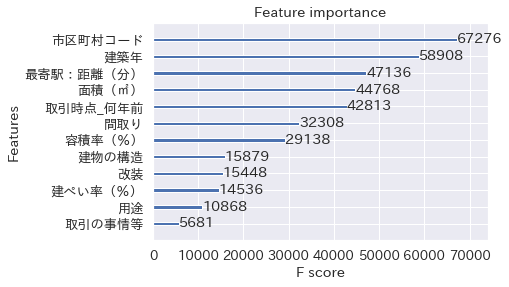

In [165]:
xgb.plot_importance(model_xgb)
plt.show()

In [162]:
y_xgb_pred = model_xgb.predict(test)

In [163]:
sample = pd.read_csv("sample_submission.csv")
sample

,ID,取引価格（総額）_log
0,1000057,0
1,1000077,0
2,1000081,0
3,1000128,0
4,1000129,0
...,...,...
20529,47001654,0
20530,47001707,0
20531,47003198,0
20532,47005507,0


In [164]:
sample["取引価格（総額）_log"] = y_xgb_pred
sample.to_csv('/content/test_submissionXGB100.csv',index = False)